In [ ]:
pip install numpy opencv-python


Low Frequency Image:


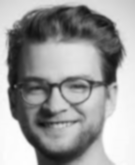

High Frequency Image:


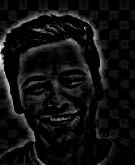

Hybrid Image:


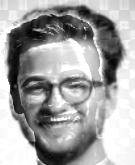

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

def create_hybrid_image(image1_path, image2_path, sigma1=1.0, sigma2=4.0):  # Reduced sigma1 for less blur
    # Load images
    img1 = cv2.imread(image1_path)
    img2 = cv2.imread(image2_path)

    # Check if images are loaded correctly
    if img1 is None:
        print(f"Error: Could not load image at {image1_path}")
        return None, None, None
    if img2 is None:
        print(f"Error: Could not load image at {image2_path}")
        return None, None, None

    # Resize images to the same dimensions
    img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

    # Convert images to grayscale
    img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to create the low-frequency image (less blur)
    low_freq = cv2.GaussianBlur(img1_gray, (0, 0), sigma1)

    # Create high-frequency image by subtracting a less blurred version from the original
    blurred_high_freq = cv2.GaussianBlur(img2_gray, (0, 0), sigma2)
    high_freq = cv2.subtract(img2_gray, blurred_high_freq)

    # Clip the high-frequency values to be in the 0-255 range
    high_freq = cv2.normalize(high_freq, None, 0, 255, cv2.NORM_MINMAX)

    # Combine the low and high frequencies to create the hybrid image
    hybrid = cv2.add(low_freq, high_freq)

    # Normalize the hybrid image to fit in the 0-255 range
    hybrid = cv2.normalize(hybrid, None, 0, 255, cv2.NORM_MINMAX)

    return low_freq, high_freq, hybrid

# Paths to your images
boy_image_path = '/content/drive/MyDrive/man.png'  # Replace with the path to the boy's image
girl_image_path = '/content/drive/MyDrive/men.png'  # Replace with the path to the girl's image

# Create hybrid images
low_freq_img, high_freq_img, hybrid_img = create_hybrid_image(boy_image_path, girl_image_path)

# Save the images
if low_freq_img is not None:
    cv2.imwrite('low_freq_image.jpg', low_freq_img)
    cv2.imwrite('high_freq_image.jpg', high_freq_img)
    cv2.imwrite('hybrid_image.jpg', hybrid_img)

    # Display the images using cv2_imshow
    print("Low Frequency Image:")
    cv2_imshow(low_freq_img)

    print("High Frequency Image:")
    cv2_imshow(high_freq_img)

    print("Hybrid Image:")
    cv2_imshow(hybrid_img)


